# Proyecciones financieras y minería web

En esta libreta se harán varios ejercicios para **extraer** datos financieros de la web.

## Importar bibliotecas

El primer paso es importar las bibliotecas de Python necesarias para realizar todas las funciones requeridas en este ejercicio.

In [2]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import yfinance as yf
yf.pdr_override()

In [3]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


## Obtener el precio de stocks de acciones de la web

Desde la API de Yahoo Finance.

In [4]:
# Definir el rango de fecha del stock de acciones
start = dt.datetime(2009, 1, 1)
end = dt.datetime(2021, 11, 25)

# Extraer los datos desde la API de Yahoo!
df = web.get_data_yahoo('META', start, end)

[*********************100%***********************]  1 of 1 completed


In [6]:
df.tail(10) # Despliega las primeras filas del dataframe

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-11,1102.770020,1104.969971,1054.680054,1063.510010,1063.510010,22396600
2021-11-12,1047.500000,1054.500000,1019.200012,1033.420044,1033.420044,25182300
2021-11-15,1017.630005,1031.979980,978.599976,1013.390015,1013.390015,34775600
2021-11-16,1003.309998,1057.199951,1002.179993,1054.729980,1054.729980,26542400
2021-11-17,1063.510010,1119.640015,1055.500000,1089.010010,1089.010010,31445400
2021-11-18,1106.550049,1112.000000,1075.020020,1096.380005,1096.380005,20898900
2021-11-19,1098.869995,1138.719971,1092.699951,1137.060059,1137.060059,21168000
2021-11-22,1162.329956,1201.949951,1132.430054,1156.869995,1156.869995,33072500
2021-11-23,1167.510010,1180.500000,1062.699951,1109.030029,1109.030029,36171700


In [7]:
df.shape # Muestra el tamaño del dataframe

(2874, 6)

### Exportar e importar los datos usando ficheros locales:


In [8]:
# Para exportarlos a un csv en nuestro equipo local:
df.to_csv('tesla.csv')

# Ir al directorio donde está el código fuente y verificar que aparece el fichero.

In [8]:
# Para importar datos al programa desde el equipo local:

df2 = pd.read_csv('tesla.csv') # Ahora estamos leyendo el archivo que habíamos exportado.

#### Ahora veamos la diferencia entre ambos datasets:

¿cuál es la diferencia entre el set de datos que importamos desde la web y desde el equipo? Nótese que no es necesario usar la función print() para imprimir los datos.

In [13]:
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [10]:
df2.shape

(2849, 7)

In [14]:
# Reindexando el archivo usando la columna de fechas, ya quedan igual:
df2 = pd.read_csv('tesla.csv', parse_dates = True, index_col = 0)
df2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [15]:
df2.shape

(2849, 6)

## Visualización preliminar de los datos

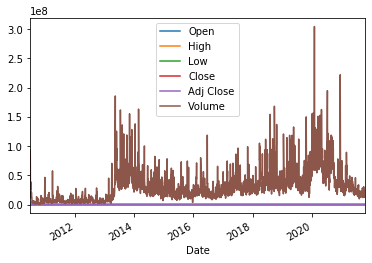

In [4]:
df.plot()
plt.show()

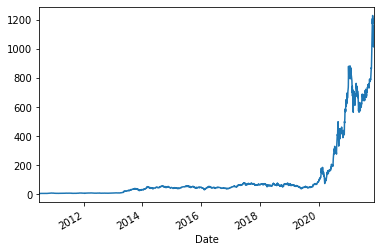

In [9]:
# Si quisieramos graficar solo una columna:
df['Close'].plot()
plt.show()

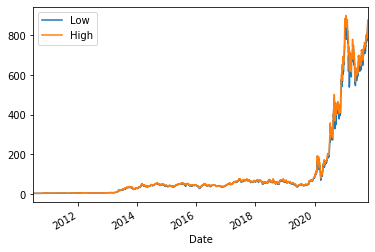

In [9]:
# Si quisieramos graficar varias columnas:
df[['Low', 'High']].plot()
plt.show()

## Análisis financiero básico

### Medias móviles:

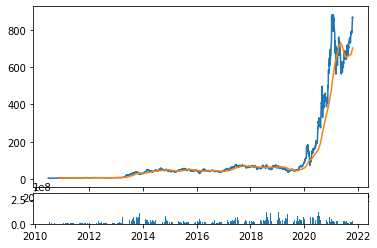

In [11]:
# Crear una columna para medias móviles con una ventana de 100 observaciones:

df['500ma'] = df['Adj Close'].rolling(window = 500).mean()

# Crear dos ejes distintos, uno para los precios y otro para el volumen:
ax1 = plt.subplot2grid((6, 1), (0, 0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6, 1), (5, 0), rowspan = 1, colspan = 1, sharex = ax1)

# Asignar columnas a graficar en cada eje:
ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])

# Mostrar el gráfico:
plt.show()

In [12]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,100ma,500ma
Date,,,,,,,,
2021-10-14,815.489990,820.250000,813.349976,818.320007,818.320007,12247200,693.885498,433.762403
2021-10-15,823.739990,843.210022,822.349976,843.030029,843.030029,18818000,696.268898,435.346231
2021-10-18,851.789978,875.260010,851.469971,870.109985,870.109985,24207200,698.778698,436.984579
2021-10-19,877.530029,877.950012,862.510010,864.270020,864.270020,17381100,701.112899,438.593247
2021-10-20,865.349976,869.489990,857.380005,865.799988,865.799988,14032100,703.518699,440.193595


### Velas japonesas (OHLC Chart):

In [14]:
# Dibujar un OHLC (Open-High-Low-Close Chart)

df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()

df_ohlc.head(15) # veamos como queda la serie y el dataframe

,open,high,low,close
Date,,,,
2010-06-29,4.778,4.778,3.160,3.492
2010-07-09,3.480,4.128,3.410,4.128
2010-07-19,4.382,4.382,4.044,4.144
2010-07-29,4.070,4.390,3.918,3.918
2010-08-08,3.920,3.920,3.520,3.830
2010-08-18,3.754,4.026,3.754,3.940
2010-08-28,3.974,4.212,3.896,4.210
2010-09-07,4.108,4.396,4.034,4.188
2010-09-17,4.046,4.212,3.912,4.020


In [16]:
# reindexar el dataframe:
df_ohlc.reset_index(inplace = True)

df_ohlc.tail() # veamos la diferencia en la numeración a la izquierda del DF con la reindexación

,index,Date,open,high,low,close
409,409,2021-09-09,754.859985,759.489990,736.270020,759.489990
410,410,2021-09-19,730.169983,791.359985,730.169983,777.559998
411,411,2021-09-29,781.309998,793.609985,775.219971,785.489990
412,412,2021-10-09,791.940002,870.109985,791.940002,870.109985
413,413,2021-10-19,864.270020,865.799988,864.270020,865.799988


In [17]:
# para manipular las fechas hay que importar una nueva biblioteca:
import matplotlib.dates as mdates

# convertir las fechas a números
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

# veamos la diferencia en la columna fecha, ahora sale como un número secuencial
df_ohlc.head()

,index,Date,open,high,low,close
0,0,733952.0,4.778,4.778,3.160,3.492
1,1,733962.0,3.480,4.128,3.410,4.128
2,2,733972.0,4.382,4.382,4.044,4.144
3,3,733982.0,4.070,4.390,3.918,3.918
4,4,733992.0,3.920,3.920,3.520,3.830


## Instalación de paquetes desde la libreta

Cuando se importan bibliotecas dentro de los programas, es porque los respectivos paquetes que las contienen ya están instalados en el equipo. En ciertas ocasiones será necesario instalar nuevos paquetes que no vienen en la instalación predeterminada para aumentar la funcionalidad con nuevos métodos y funciones incluídas en nuevas bibliotecas.

Lo indicado es ejecutar la instalación desde el Anaconda Prompt, usando `conda` o `pip` seguido del comando `install` y el nombre del paquete deseado, pero también se puede ejecutar directamente desde la libreta de Jupyter anteponiendo un signo de admiración de cierre antes, tal y como se demuestra en la siguiente celda:

In [23]:
!pip install mpl_finance

In [24]:
df_ohlc.drop('index', 1)

,Date,open,high,low,close
0,733952.0,4.778000,4.778000,3.160000,3.492000
1,733962.0,3.480000,4.128000,3.410000,4.128000
2,733972.0,4.382000,4.382000,4.044000,4.144000
3,733982.0,4.070000,4.390000,3.918000,3.918000
4,733992.0,3.920000,3.920000,3.520000,3.830000
5,734002.0,3.754000,4.026000,3.754000,3.940000
6,734012.0,3.974000,4.212000,3.896000,4.210000
7,734022.0,4.108000,4.396000,4.034000,4.188000
8,734032.0,4.046000,4.212000,3.912000,4.020000
9,734042.0,4.106000,4.396000,4.082000,4.092000


Una vez descargados los paquetes y dependencias e instalados satisfactoriamente, se puede importar al programa:

In [25]:
from mpl_finance import candlestick_ohlc

ax1 = plt.subplot2grid((6, 1), (0, 0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6, 1), (5, 0), rowspan = 1, colspan = 1, sharex = ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, width = 2, colorup = 'g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
plt.show()

ValueError: view limit minimum -36905.15 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

## Análisis de un índice de mercado

Se introducirá el concepto de funciones en Python para analizar índices de mercados bursátiles

### Función para obtener los tickers de las empresas aplicando minería web:

In [26]:
# La función usará las siguientes bibliotecas:
import bs4 as bs
import pickle
import requests

In [27]:
def save_sp500_tickers():
    
    resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'id':'constituents'})
    tickers = []
    
    # solo se extraerán las primeras 50 empresas de la lista [1:50] si se quieren las 500 dejar [1:]
    for row in table.findAll('tr')[1:50]: 
        ticker = row.findAll('td')[0].text.replace('\n', '')
        tickers.append(ticker)

    with open("sp500tickers.pickle", "wb") as f:
        pickle.dump(tickers, f)
        
    return tickers

In [28]:
# Así se llama una función:
tickers = save_sp500_tickers()
tickers # ver los tickers de las primeras 50 empresas del indice S&P500

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ANET']

### Obtener los datos financieros de los tickers extraídos:

In [31]:
import os

In [32]:
def get_data_from_yahoo(reload_sp500 = True): #Alternar entre True y False, dependiendo
    
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle", "rb") as f:
            tickers = pickle.load(f)
    
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')
    
    start = dt.datetime(2000, 1, 1)
    end = dt.datetime(2021, 10, 25)
    
    for ticker in tickers: #si quisieramos solo las primeras x agregar a tickers[:x]
        print(ticker)
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            df = web.get_data_yahoo(ticker, start, end)
            df.to_csv('stock_dfs/{}.csv'.format(ticker))
        else:
            print('Ya existe {}'.format(ticker))

In [33]:
get_data_from_yahoo()

MMM
[*********************100%***********************]  1 of 1 completed
ABT
[*********************100%***********************]  1 of 1 completed
ABBV
[*********************100%***********************]  1 of 1 completed
ABMD
[*********************100%***********************]  1 of 1 completed
ACN
[*********************100%***********************]  1 of 1 completed
ATVI
[*********************100%***********************]  1 of 1 completed
ADBE
[*********************100%***********************]  1 of 1 completed
AMD
[*********************100%***********************]  1 of 1 completed
AAP
[*********************100%***********************]  1 of 1 completed
AES
[*********************100%***********************]  1 of 1 completed
AFL
[*********************100%***********************]  1 of 1 completed
A
[*********************100%***********************]  1 of 1 completed
APD
[*********************100%***********************]  1 of 1 completed
AKAM
[*********************100%******************

### Unir todos los archivos financieros descargados en uno solo

In [34]:
def compile_data():
    
    with open("sp500tickers.pickle", "rb") as f:
        tickers = pickle.load(f)
        
    main_df = pd.DataFrame()
    
    for count, ticker in enumerate(tickers):
        df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
        df.set_index('Date', inplace = True)
        
        df.rename(columns = {'Adj Close':ticker}, inplace = True)
        df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace = True)
        
        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, how = 'outer')

    print(main_df.head())
    main_df.to_csv('sp500_joined_closes.csv')

In [35]:
# Llamar la función anterior:
compile_data()

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  27.179525  9.418209   NaN  18.25000  NaN  1.221640  16.274672   
2000-01-04  26.099554  9.149116   NaN  17.81250  NaN  1.184479  14.909401   
2000-01-05  26.855526  9.132298   NaN  18.00000  NaN  1.189124  15.204176   
2000-01-06  29.015493  9.451844   NaN  18.03125  NaN  1.165900  15.328291   
2000-01-07  29.591475  9.552755   NaN  17.93750  NaN  1.198414  16.072985   

               AMD  AAP        AES  ...      ANSS  ANTM        AON       AOS  \
Date                                ...                                        
2000-01-03  15.500  NaN  27.634907  ...  2.765625   NaN  27.307436  2.448000   
2000-01-04  14.625  NaN  26.539042  ...  2.687500   NaN  26.694784  2.412727   
2000-01-05  15.000  NaN  26.824924  ...  2.703125   NaN  27.482489  2.405672   
2000-01-06  16.000  NaN  27.039330  ...  2.703125   NaN  28.

In [36]:
# Importar el archivo combinado a un dataframe:
df = pd.read_csv('sp500_joined_closes.csv') 
   
# Crear una matríz de correlación:    
df_corr = df.corr()

# Desplegar la matriz de correlación:
df_corr

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,ANSS,ANTM,AON,AOS,APA,AAPL,AMAT,APTV,ADM,ANET
MMM,1.000000,0.843994,0.811606,0.856689,0.878707,0.915461,0.770680,0.370727,0.900937,-0.016885,...,0.830341,0.895043,0.897593,0.979364,-0.199418,0.779392,0.692156,0.799899,0.887502,0.767620
ABT,0.843994,1.000000,0.901199,0.884422,0.985906,0.936155,0.974929,0.732495,0.819485,0.191667,...,0.989501,0.968529,0.980333,0.893011,-0.358588,0.973470,0.883849,0.894718,0.845643,0.843803
ABBV,0.811606,0.901199,1.000000,0.869135,0.928862,0.941842,0.916737,0.836127,0.512926,0.775502,...,0.898179,0.941284,0.912816,0.894321,-0.801593,0.885141,0.898092,0.911108,0.807664,0.913776
ABMD,0.856689,0.884422,0.869135,1.000000,0.896581,0.925140,0.883943,0.609084,0.754609,0.189624,...,0.864748,0.930510,0.891404,0.897771,-0.415066,0.836154,0.795139,0.797325,0.749657,0.887744
ACN,0.878707,0.985906,0.928862,0.896581,1.000000,0.951151,0.968498,0.761349,0.851864,0.623130,...,0.981877,0.972905,0.988728,0.928462,-0.440659,0.968723,0.918677,0.930455,0.870619,0.872285
ATVI,0.915461,0.936155,0.941842,0.925140,0.951151,1.000000,0.917363,0.620266,0.806318,0.114618,...,0.940412,0.945772,0.947394,0.957263,-0.320131,0.915069,0.847004,0.885320,0.852278,0.848386
ADBE,0.770680,0.974929,0.916737,0.883943,0.968498,0.917363,1.000000,0.831614,0.731053,0.257056,...,0.972709,0.949834,0.950237,0.844029,-0.421909,0.977771,0.926936,0.890600,0.775921,0.858172
AMD,0.370727,0.732495,0.836127,0.609084,0.761349,0.620266,0.831614,1.000000,0.427806,0.504097,...,0.736559,0.738346,0.667636,0.488922,-0.516783,0.801892,0.847572,0.824199,0.440540,0.752877
AAP,0.900937,0.819485,0.512926,0.754609,0.851864,0.806318,0.731053,0.427806,1.000000,0.495216,...,0.795070,0.835756,0.862579,0.889138,-0.282023,0.769285,0.663499,0.717137,0.896864,0.223774
AES,-0.016885,0.191667,0.775502,0.189624,0.623130,0.114618,0.257056,0.504097,0.495216,1.000000,...,0.166959,0.693407,0.172181,0.063167,-0.343044,0.217994,0.372935,0.847505,0.015474,0.746813


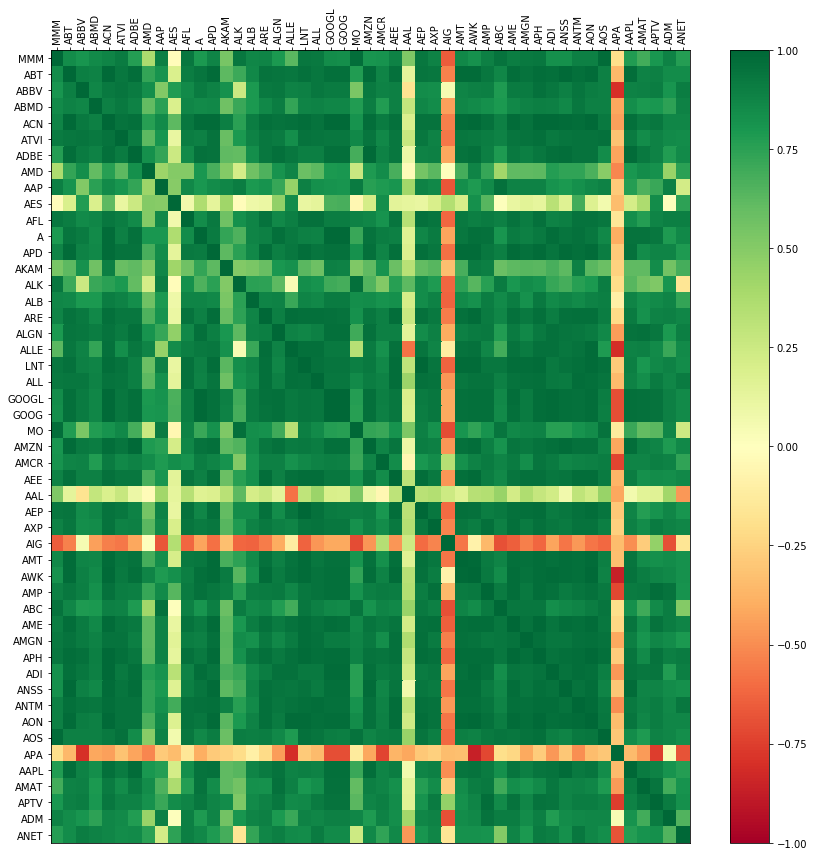

In [37]:
import numpy as np

# Crear un mapa de calor de las correlaciones:

data = df_corr.values
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1, 1, 1,)

heatmap = ax.pcolor(data, cmap = plt.cm.RdYlGn)
fig.colorbar(heatmap)
ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor = False)
ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor = False)
ax.invert_yaxis()
ax.xaxis.tick_top()

column_labels = df_corr.columns
row_labels = df_corr.index

ax.set_xticklabels(column_labels)
ax.set_yticklabels(row_labels)
plt.xticks(rotation = 90)
heatmap.set_clim(-1, 1)
plt.tight_layout()
plt.show()